#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Gender x Age group

In [6]:
df_gender_age = df[['M/F', 'Age Group']]
df_male_age = df_gender_age[df_gender_age['M/F'] == 'M']
df_female_age = df_gender_age[df_gender_age['M/F'] == 'F']

In [7]:
# males
male_age_groups_count = df_male_age['Age Group'].value_counts().sort_index()
male_age_groups_percent = round(df_male_age['Age Group'].value_counts(normalize=True).sort_index() * 100,2)
# females
female_age_groups_count = df_female_age['Age Group'].value_counts().sort_index()
female_age_groups_percent = round(df_female_age['Age Group'].value_counts(normalize=True).sort_index() * 100,2)
# creating df to present results
df_male_age_groups_dist = pd.concat([male_age_groups_count, male_age_groups_percent], axis=1)
df_female_age_groups_dist = pd.concat([female_age_groups_count, female_age_groups_percent], axis=1)

print('male')
print(df_male_age_groups_dist)
print('\nfemale')
print(df_female_age_groups_dist)

male
           count  proportion
Age Group                   
18–21        460        1.06
22–25       1641        3.77
26–29       2869        6.60
30–33       3405        7.83
34–37       4082        9.39
38–41       4691       10.79
42–45       5316       12.23
46–49       5707       13.12
50–53       5089       11.70
54–57       4236        9.74
58–61       3026        6.96
62–65       1635        3.76
66–69        828        1.90
70–84        497        1.14

female
           count  proportion
Age Group                   
18–21        492        1.36
22–25       2820        7.80
26–29       4259       11.78
30–33       3783       10.46
34–37       4297       11.88
38–41       4766       13.18
42–45       4559       12.61
46–49       4193       11.60
50–53       3193        8.83
54–57       1918        5.30
58–61       1114        3.08
62–65        486        1.34
66–69        190        0.53
70–84         86        0.24


### visualization

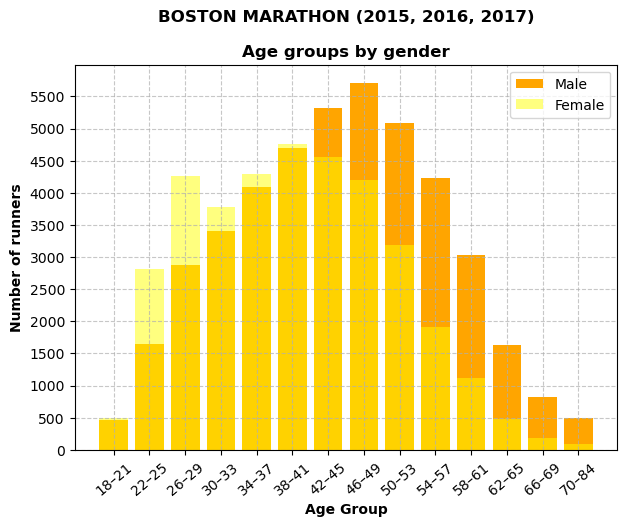

In [9]:
x_m = df_male_age_groups_dist
x_fm = df_female_age_groups_dist

plt.figure(figsize=(7,5))
width = 0.4

plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
plt.bar(x_fm.index, x_fm['count'], alpha=0.5, color='yellow', label='Female')

plt.legend()
plt.xticks(rotation=40)
plt.yticks(np.arange(0,6000,500))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAge groups by gender', fontweight='bold')

plt.savefig("../vexport/genderxagegroups.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [11]:
df_male_age_groups_dist.to_csv('../export/genderxagegroups_male.csv')
df_female_age_groups_dist.to_csv('../export/genderxagegroups_female.csv')